# Ames, IA Housing Prices - Regression Model
---

# Notebook 02 - EDA

## Imports

### Libraries

In [10]:
import sys
# Adding path to src code modules
sys.path.append("../")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.utilities.graph import my_boxplot, my_histplot, my_scatterplot
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

### Data

In [11]:
# Create list of the default na values pandas .read_csv method uses to parse NaN value but remove "NA" from the list
na_values = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NULL', 'NaN', 'n/a', 'nan', 'null']

# Read in CSV with new values for NaN parsing
train = pd.read_csv("../data/interim/train_cleaned.csv", keep_default_na=False, na_values=na_values)

## EDA

In [17]:
# Import list of features organized by property characteristics
from src.data.features_by_characteristic import all_characteristics

In [18]:
for k,v in all_characteristics.items():
    print(k)

id
land
building_general
building_age
building_exterior
basement
hvac
interior
garage
misc
sale_type


### Building Age

In [19]:
building_age_cols = all_characteristics["building_age"]

In [22]:
train[building_age_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year Built      2049 non-null   int64
 1   Year Remod/Add  2049 non-null   int64
 2   Mo Sold         2049 non-null   int64
 3   Yr Sold         2049 non-null   int64
dtypes: int64(4)
memory usage: 64.2 KB


In [28]:
sold_df = train[["Mo Sold", "Yr Sold"]].rename(columns={"Mo Sold": "month", "Yr Sold": "year"})
sold_df['day'] = 1

In [31]:
sold_df = pd.to_datetime(sold_df)

In [32]:
year_built_df = train[["Year Built"]].rename(columns={"Year Built": "year"})
year_built_df['day'] = 1
year_built_df['month'] = 1
year_built_df = pd.to_datetime(year_built_df)

In [34]:
train['building_age_at_sale'] = sold_df - year_built_df

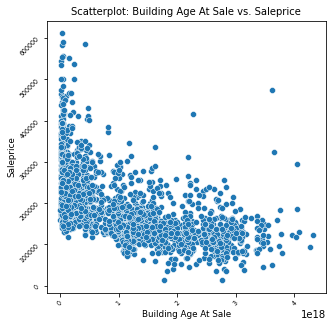

In [36]:
my_scatterplot(train, x_col="building_age_at_sale", y_col="SalePrice", size=5)

### Land

In [39]:
train["MS SubClass"] = train["MS SubClass"].astype('object')

In [42]:
train[all_characteristics['land']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MS SubClass   2049 non-null   object 
 1   MS Zoning     2049 non-null   object 
 2   Lot Frontage  2049 non-null   float64
 3   Lot Area      2049 non-null   int64  
 4   Street        2049 non-null   object 
 5   Alley         2049 non-null   object 
 6   Lot Shape     2049 non-null   object 
 7   Land Contour  2049 non-null   object 
 8   Utilities     2049 non-null   int64  
 9   Lot Config    2049 non-null   object 
 10  Land Slope    2049 non-null   object 
 11  Neighborhood  2049 non-null   object 
 12  Condition 1   2049 non-null   object 
 13  Condition 2   2049 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 224.2+ KB


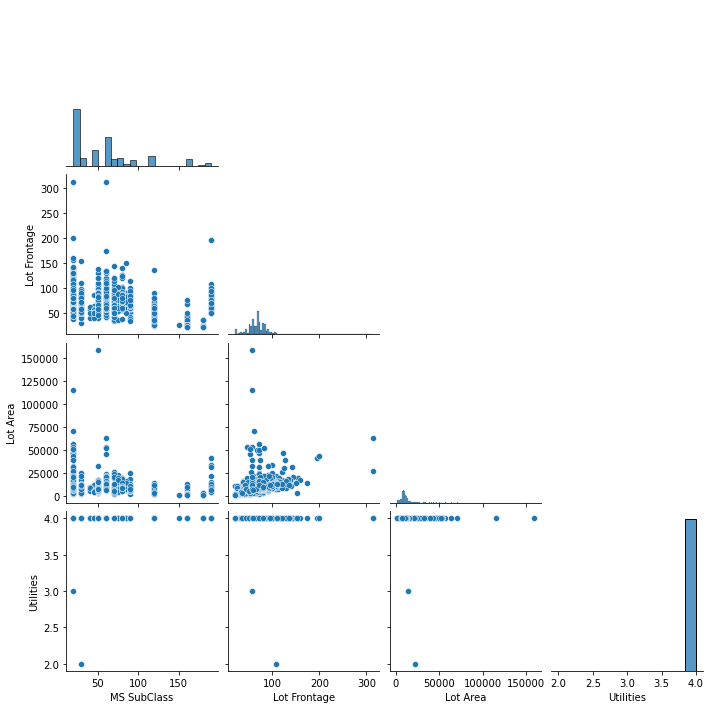

In [41]:
sns.pairplot(train[all_characteristics['land']], corner=True)

In [45]:
for col in all_characteristics["land"]:
    if train[col].dtype == "object":
        print(f"***{col}***")
        print(train[col].value_counts())
        print("\n")

***MS SubClass***
20     769
60     394
50     198
120    132
30     101
70      89
160     88
80      86
90      75
190     46
85      28
75      16
180     11
45      11
40       4
150      1
Name: MS SubClass, dtype: int64


***MS Zoning***
RL         1598
RM          314
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64


***Street***
Pave    2042
Grvl       7
Name: Street, dtype: int64


***Alley***
NA      1909
Grvl      85
Pave      55
Name: Alley, dtype: int64


***Lot Shape***
Reg    1294
IR1     691
IR2      55
IR3       9
Name: Lot Shape, dtype: int64


***Land Contour***
Lvl    1841
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64


***Lot Config***
Inside     1502
Corner      348
CulDSac     131
FR2          60
FR3           8
Name: Lot Config, dtype: int64


***Land Slope***
Gtl    1951
Mod      88
Sev      10
Name: Land Slope, dtype: int64


***Neighborhood***
NAmes      310
CollgCr    180
Ol

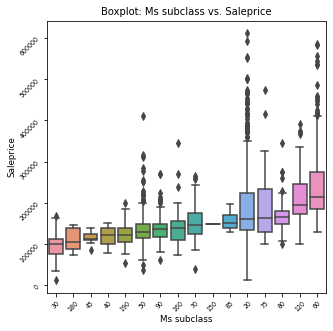

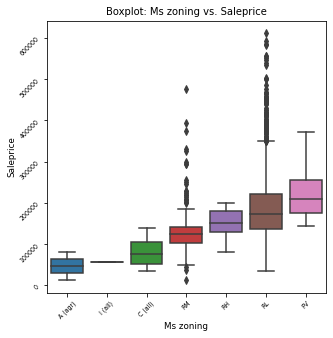

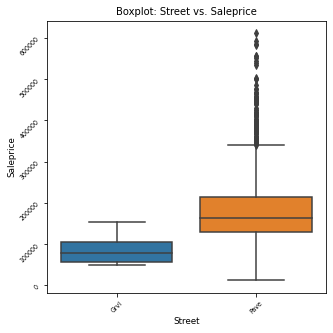

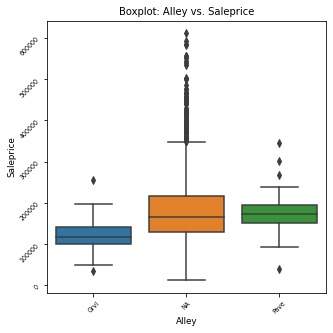

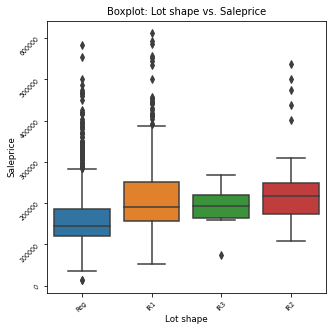

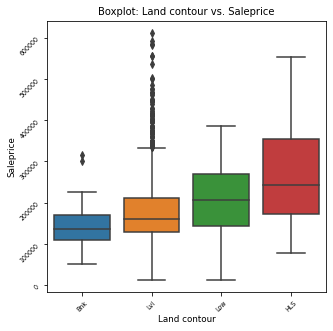

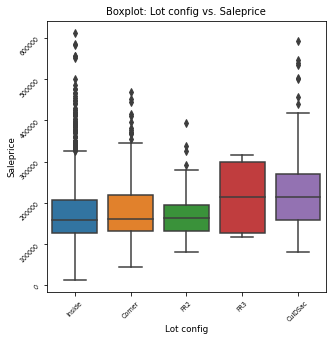

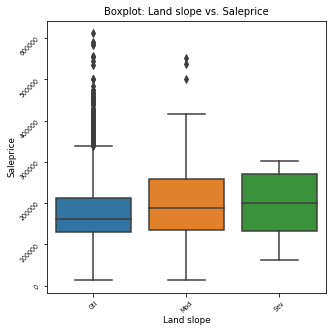

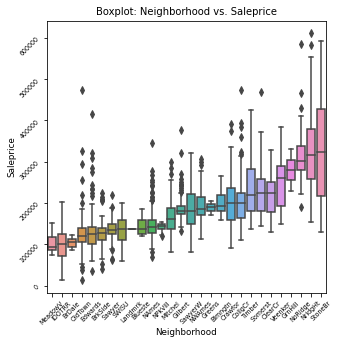

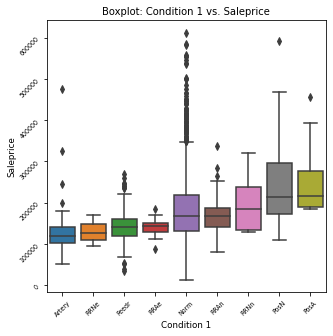

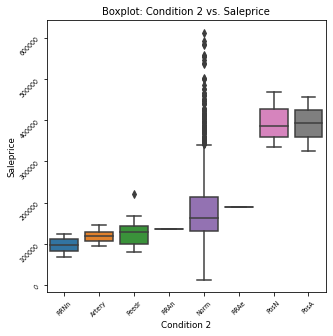

In [46]:
for col in all_characteristics["land"]:
    if train[col].dtype == "object":
        my_boxplot(train, x_col=col, y_col="SalePrice", size=5)

### Condition 1 and Condition 2

In [48]:
conditions_df = train[["Condition 1", "Condition 2"]]

In [50]:
conditions_df.groupby("Condition 1")["Condition 2"].value_counts()

Condition 1  Condition 2
Artery       Norm             67
             Artery            2
             PosA              1
Feedr        Norm            101
             Feedr             2
             RRNn              2
             Artery            1
             RRAe              1
             RRAn              1
Norm         Norm           1766
PosA         Norm             10
             PosA              2
PosN         Norm             24
             PosN              3
RRAe         Norm             21
RRAn         Norm             27
             Feedr             8
             Artery            1
RRNe         Norm              3
RRNn         Norm              4
             Artery            1
             Feedr             1
Name: Condition 2, dtype: int64

In [59]:
all_conditions = set(list(conditions_df['Condition 1'])).union(set(list(conditions_df['Condition 2'])))

In [62]:
list(all_conditions)

['RRNn', 'Artery', 'RRAe', 'Norm', 'PosN', 'PosA', 'Feedr', 'RRAn', 'RRNe']

In [70]:
conditions_dict = {
    'RRNn': 0, 
    'Artery': 0, 
    'RRAe': 0, 
    'Norm': 0, 
    'PosN': 0, 
    'PosA': 0, 
    'Feedr': 0, 
    'RRAn': 0, 
    'RRNe': 0,
}

def consolidate_conditions(x):
    # Set dictionary of conditions for row
    row_conditions = {
    'RRNn': 0, 
    'Artery': 0, 
    'RRAe': 0, 
    'Norm': 0, 
    'PosN': 0, 
    'PosA': 0, 
    'Feedr': 0, 
    'RRAn': 0, 
    'RRNe': 0,
    }

    condition1 = x['Condition 1']
    condition2 = x["Condition 2"]
    row_conditions[condition1] = row_conditions[condition1] + 1
    row_conditions[condition2] = row_conditions[condition2] + 1
    return row_conditions

conditions_dummied_df = pd.DataFrame(list(conditions_df.apply(lambda x: consolidate_conditions(x), axis=1)))

In [71]:
conditions_dummied_df["SalePrice"] = train["SalePrice"]

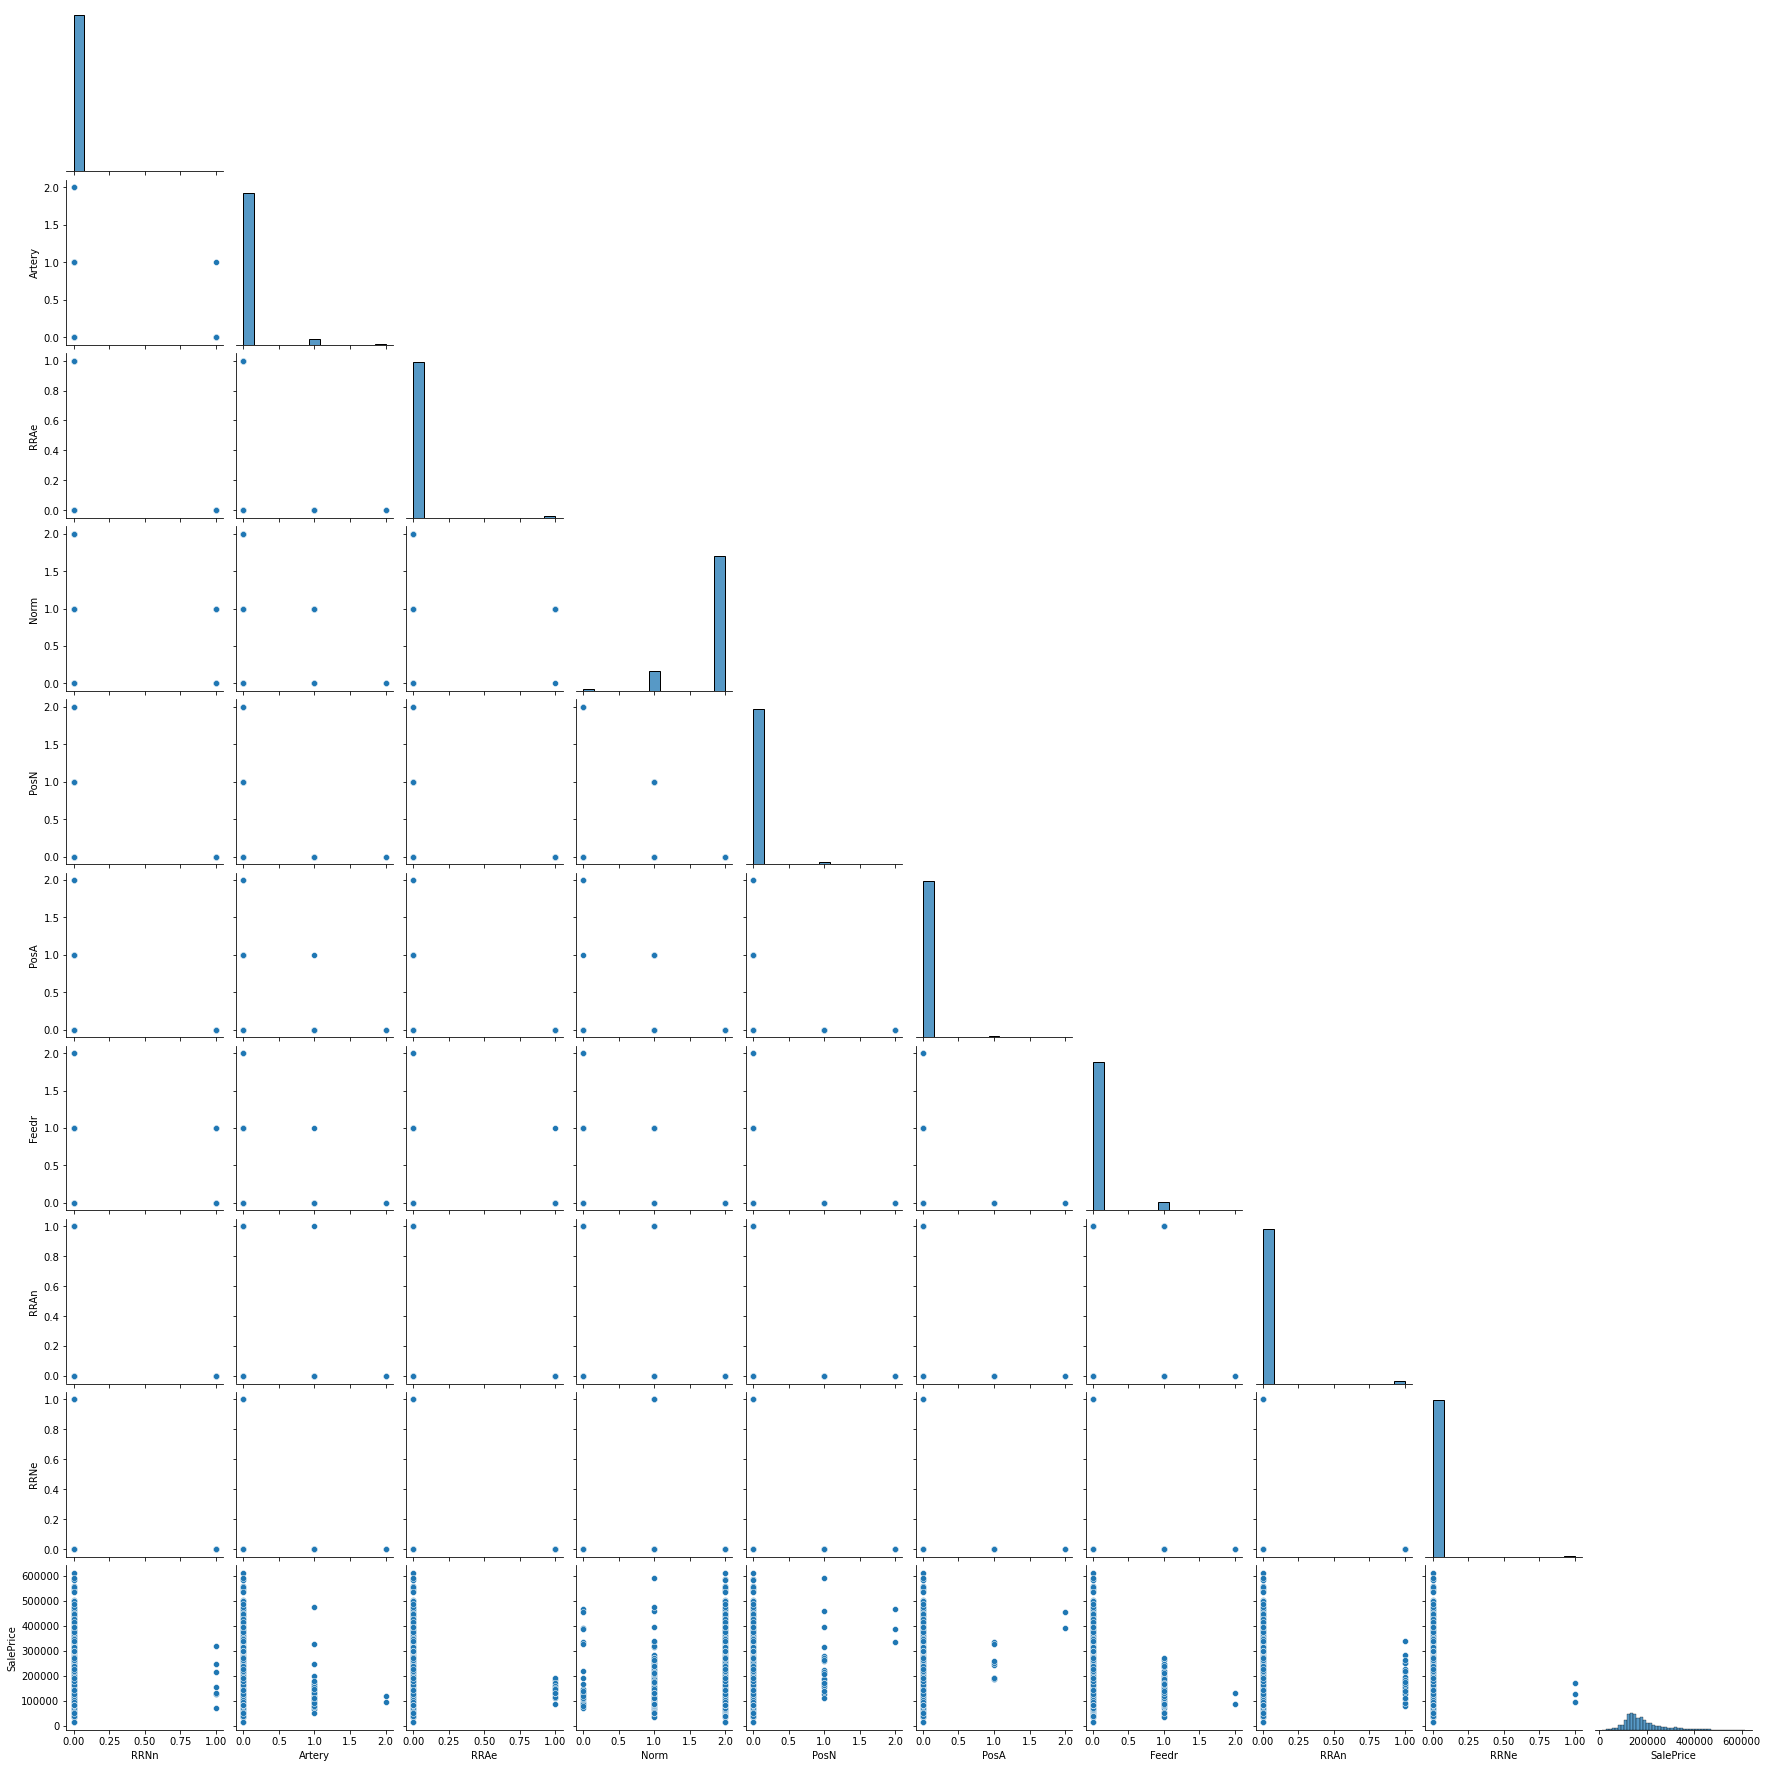

In [73]:
sns.pairplot(conditions_dummied_df, corner=True)

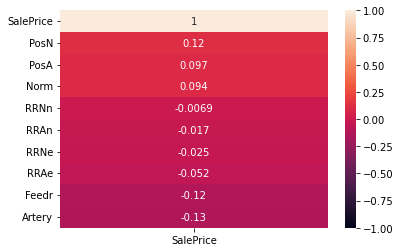

In [72]:
sns.heatmap(
    conditions_dummied_df.corr()[["SalePrice"]].sort_values(by="SalePrice", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
);

In [83]:
def positive_conditions(x):
    pos_count = 0
    condition1 = x['Condition 1']
    condition2 = x["Condition 2"]
    if condition1 in ["PosN", "PosA"]:
        pos_count += 1
    if condition2 in ["PosN", "PosA"]:
        pos_count += 1
    return pos_count

positive_conditions_df = train.apply(lambda x: positive_conditions(x), axis=1)

In [84]:
positive_conditions_df = pd.DataFrame({"positive_condition": positive_conditions_df, "sale_price": train["SalePrice"]})

In [85]:
positive_conditions_df

,positive_condition,sale_price
0,0,130500
1,0,220000
2,0,109000
3,0,174000
4,0,138500
...,...,...
2044,0,298751
2045,0,82500
2046,0,177000
2047,0,144000


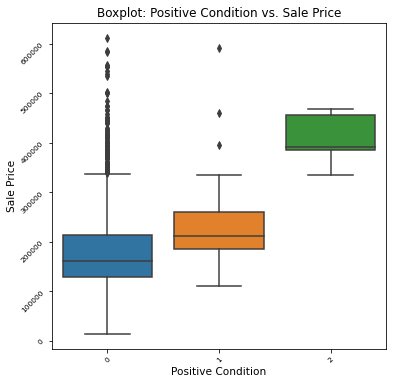

In [88]:
my_boxplot(positive_conditions_df, x_col="positive_condition", y_col="sale_price", size=6)

/Users/matthewlee/Desktop/portfolio_projects/ames-housing-regression-models/notebooks/../src/utilities/graph.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(size, size))


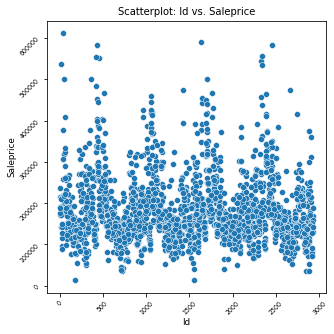

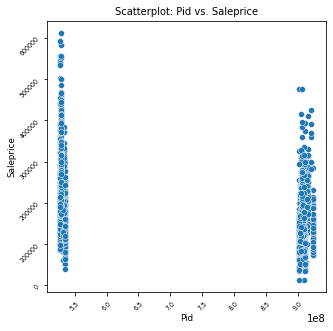

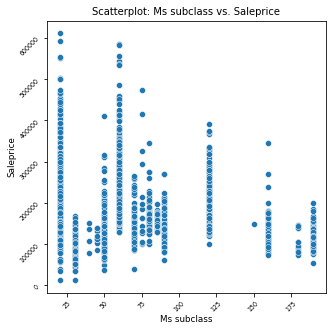

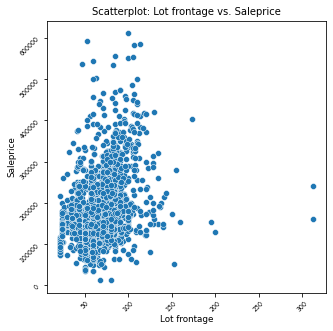

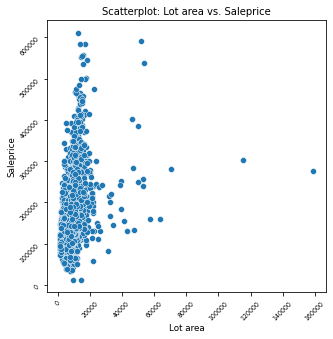

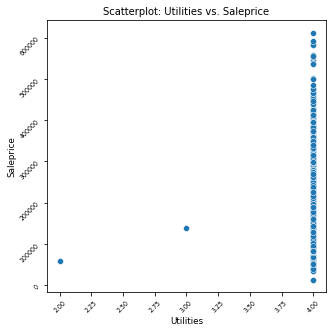

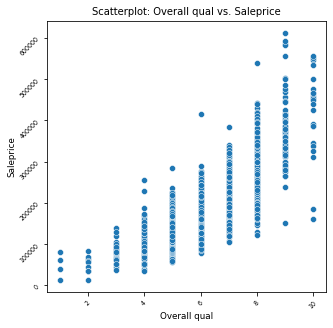

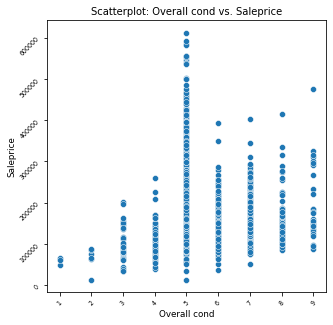

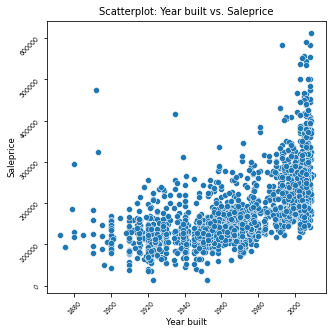

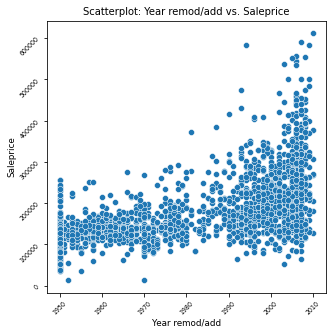

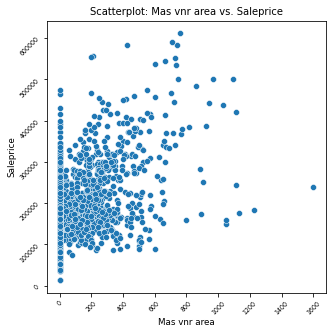

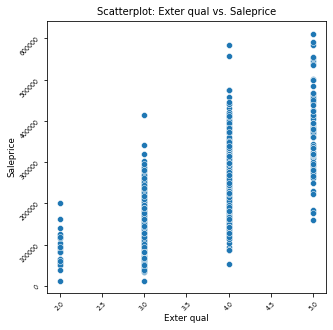

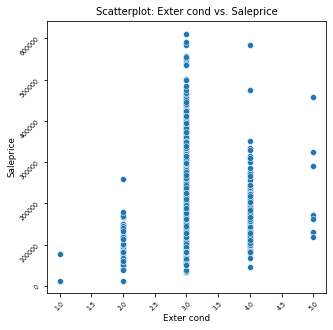

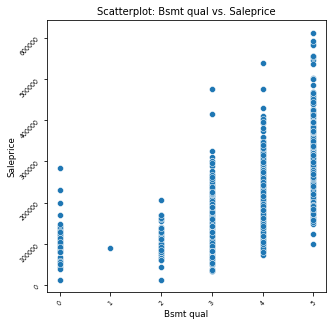

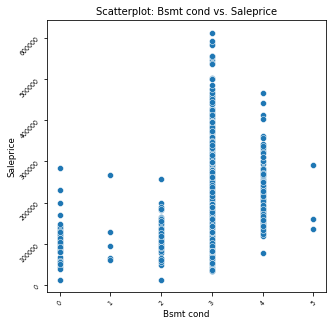

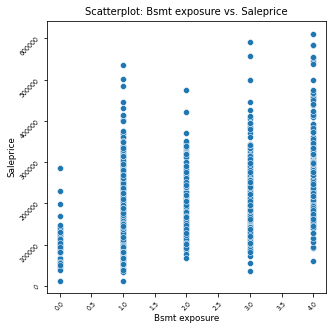

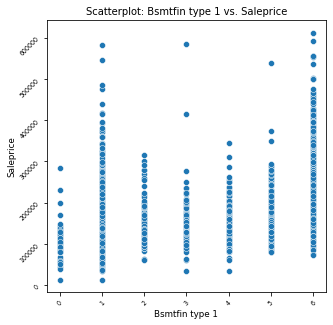

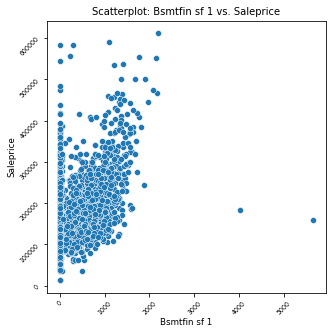

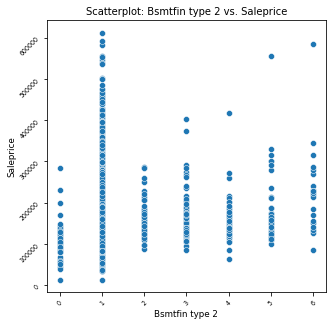

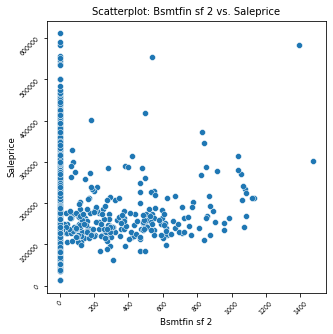

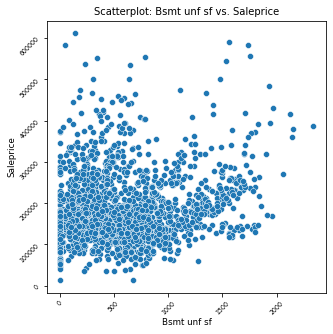

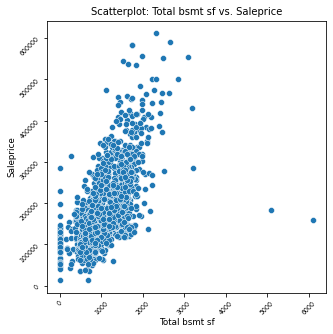

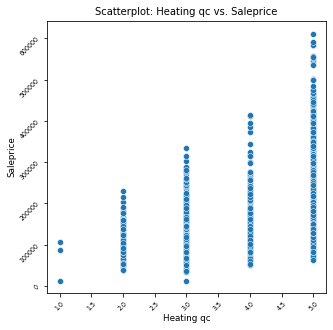

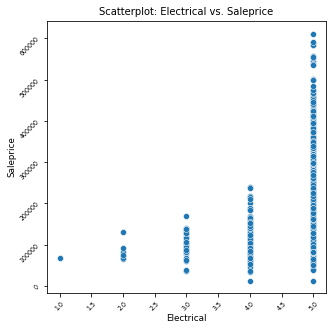

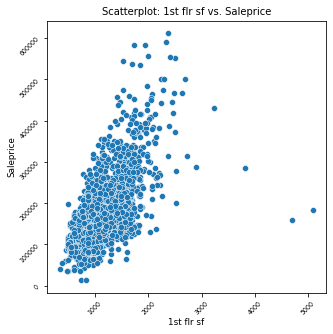

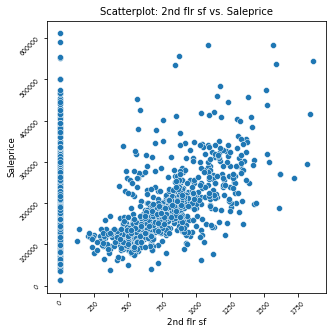

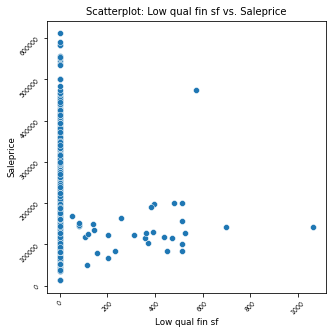

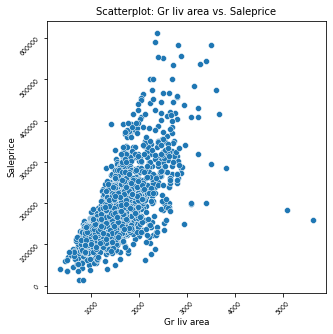

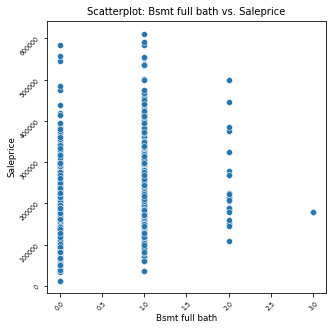

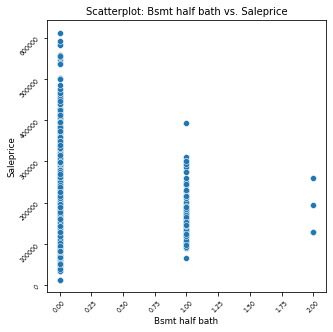

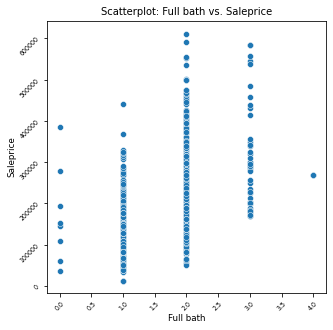

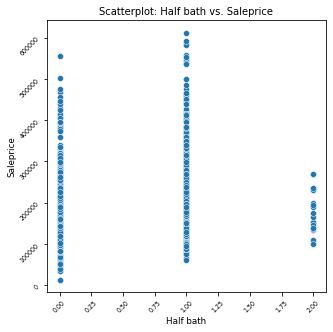

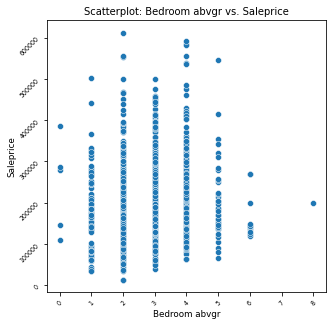

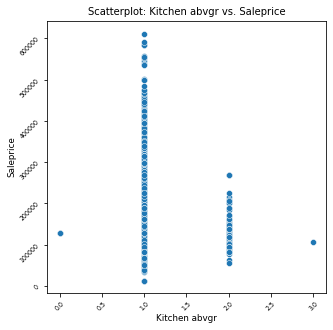

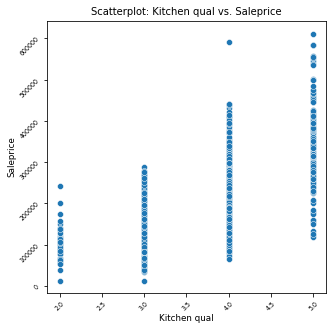

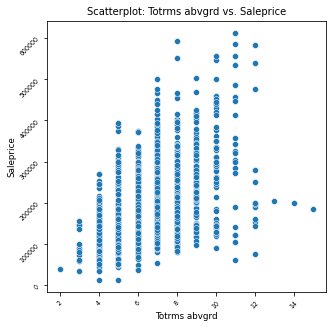

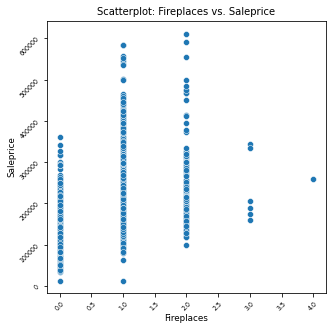

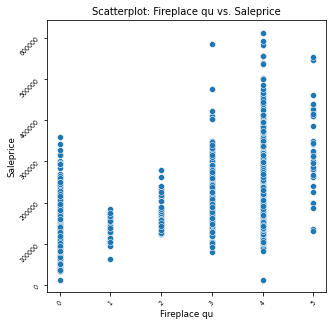

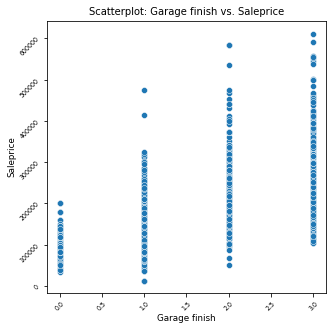

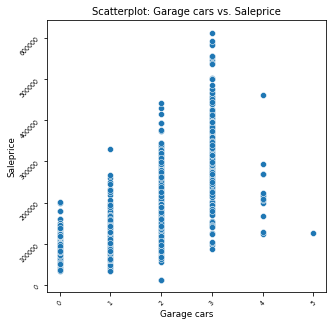

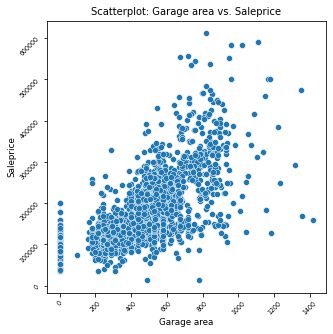

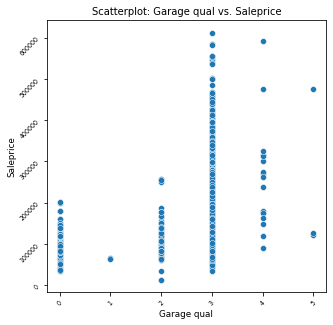

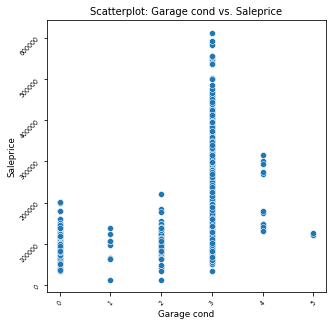

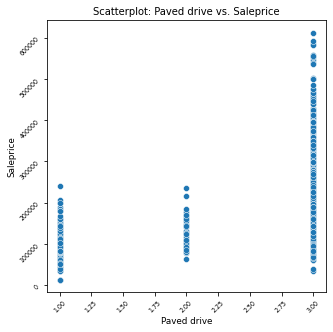

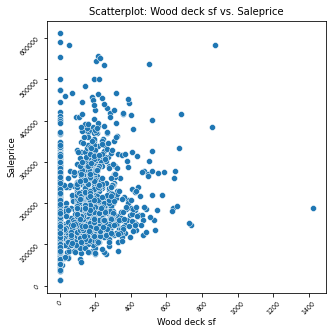

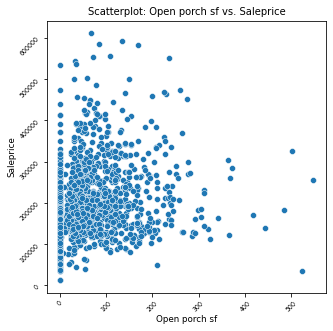

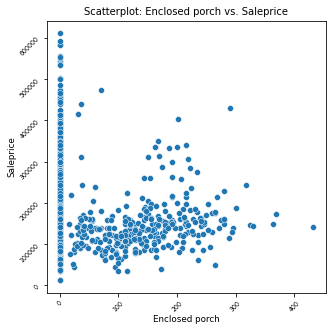

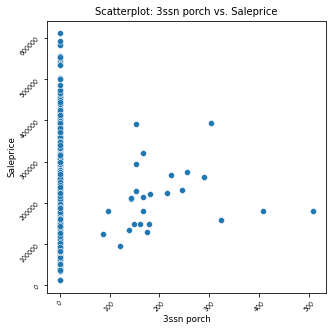

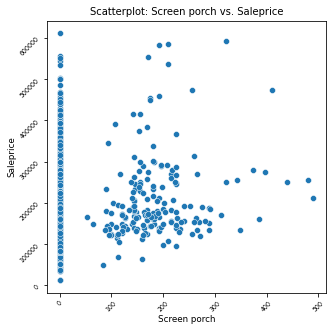

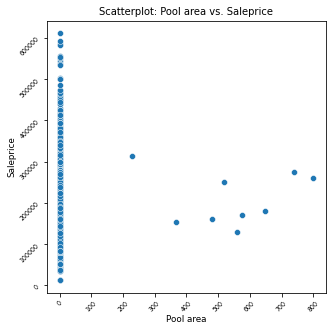

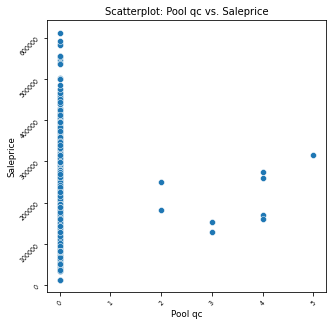

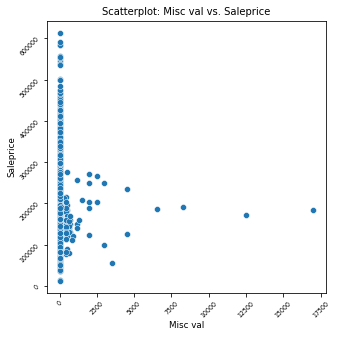

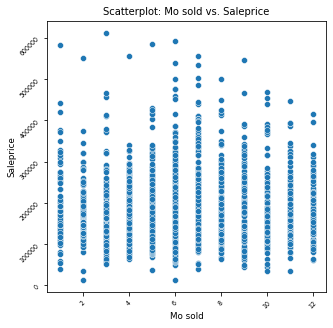

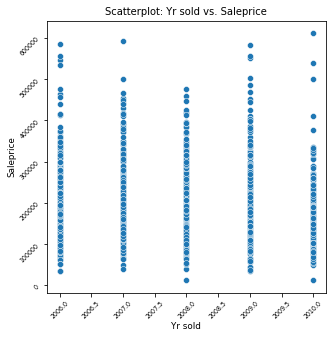

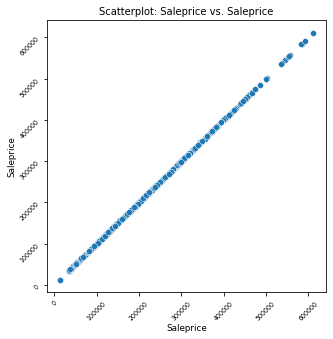

In [15]:
for col in numerical:
    my_scatterplot(train, x_col=col, y_col="SalePrice", size=5)

/Users/matthewlee/Desktop/portfolio_projects/ames-housing-regression-models/notebooks/../src/utilities/graph.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(size, size))


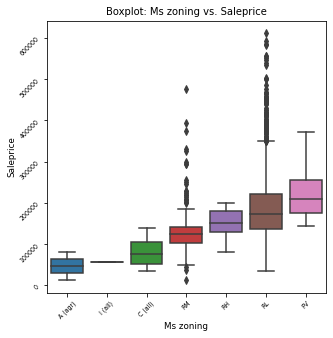

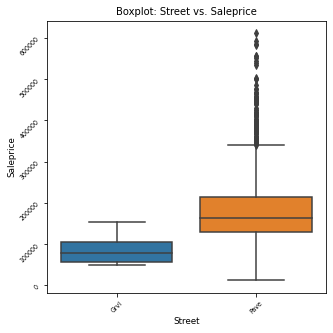

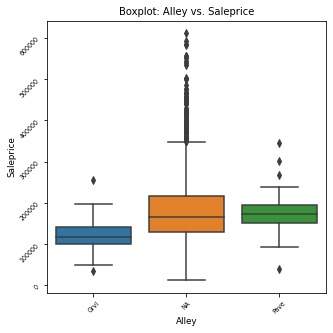

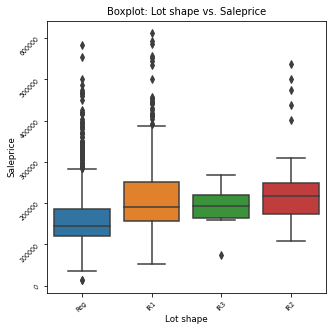

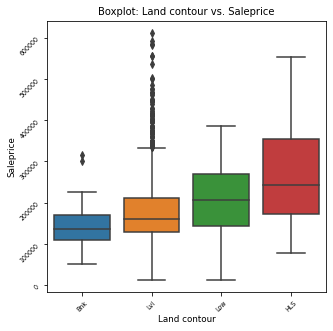

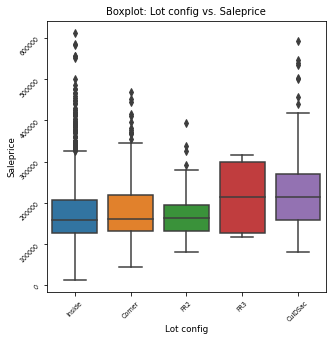

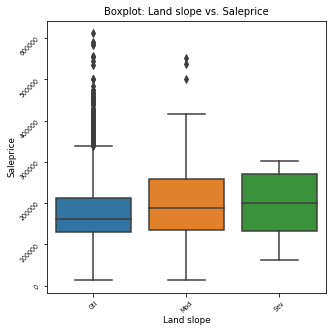

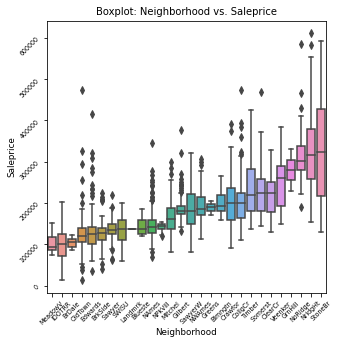

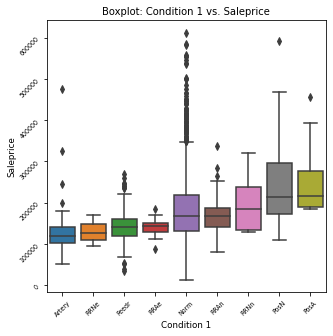

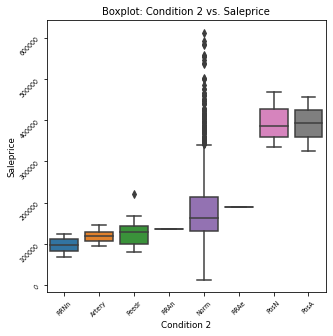

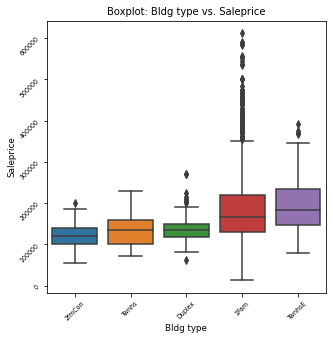

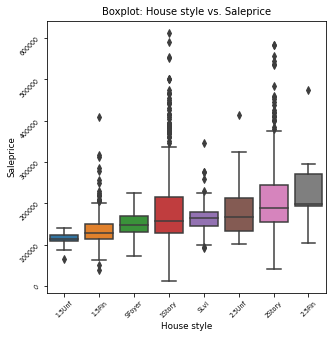

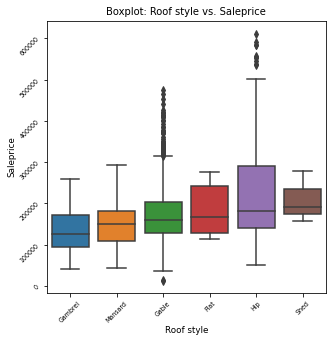

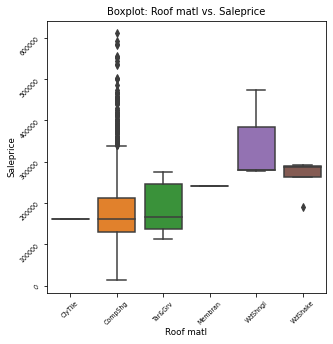

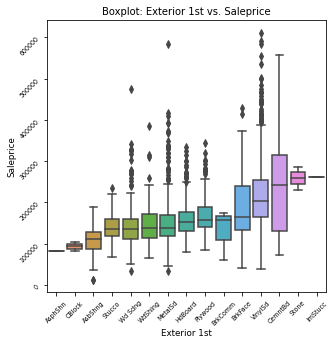

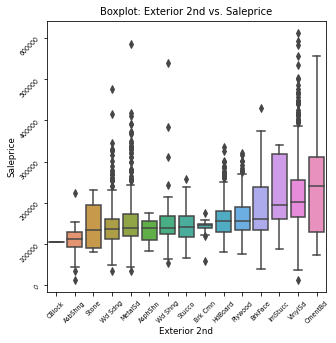

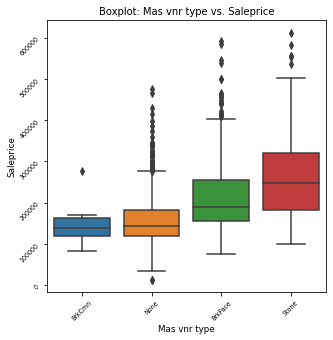

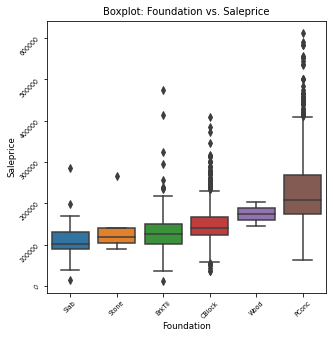

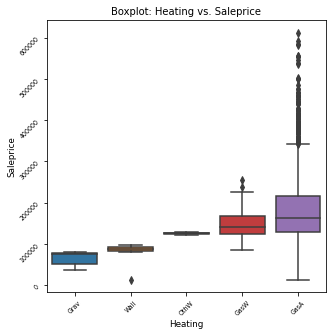

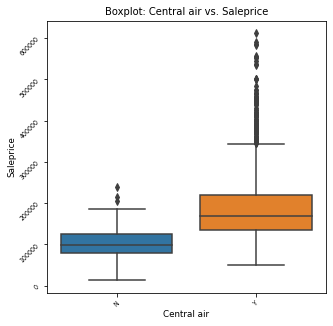

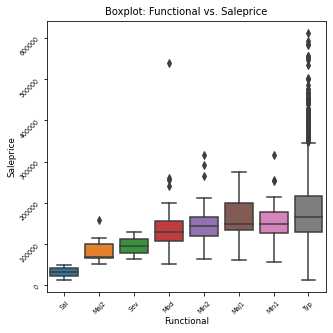

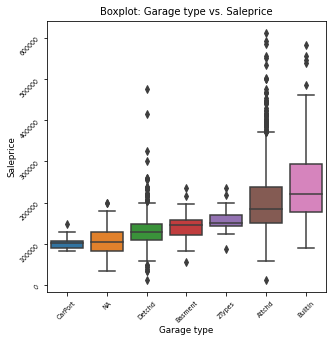

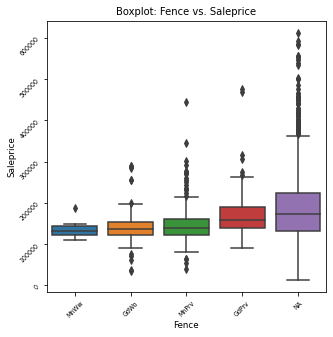

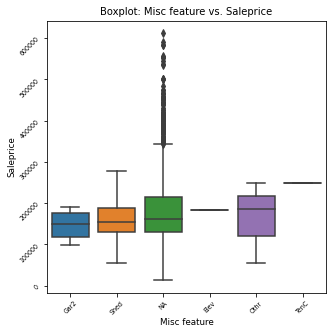

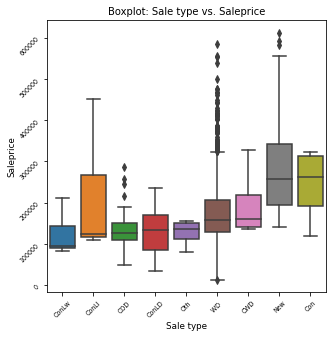

In [13]:
for col in categoricals:
    my_boxplot(train, x_col=col, y_col="SalePrice", size=5)